<a href="https://colab.research.google.com/github/valeriaquiroz/diabetes/blob/main/Diabetes_Globant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Produced by**: Valeria Quiroz Gomez    **Date**:September 2021

**I choose the point 3**: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008# 

In the URL to data set I found the explication for each variable.


Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1) It is an inpatient encounter (a hospital admission).
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
(3) The length of stay was at least 1 day and at most 14 days.
(4) Laboratory tests were performed during the encounter.
(5) Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [133]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plot
import seaborn as sns #plot
from sklearn.model_selection import train_test_split #model
from sklearn.linear_model import LogisticRegression #model
from sklearn.model_selection import cross_val_score #validation
from sklearn.metrics import accuracy_score, precision_score, recall_score #metrics of evaluation
from imblearn.over_sampling import SMOTE
from collections import Counter

In [134]:
#read to dataset 
df = pd.read_csv("/content/diabetic_data.csv")
df #see to dataFrame 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


The data set has a total of 101766 rows and 50 columns

In [135]:
#Data Exploration and main statistics
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


The dataset indicates that there are no null values, but some of them have a question mark (?)
**The data marked with ? are treated as null data**

In [136]:
df.isnull().sum() #dataframe that contains null values
#the dataset indicates that there are no null values, but some of them have a question mark (?)
#the data marked with ? are treated as null data

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [137]:
df.dtypes #data types of each variable

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

The dataset indicates that there are no null values, but some of them have a question mark (?)
The data marked with ? are treated as null data

In [138]:
#count the data null, mark with ? in the Df
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


**The columns that have null data are**:
race with 2273 rows, weight with 98569 rows, payer_code  with 40256 rows, medical_specialty with 49949 rows, diag_1 with 21 rows, diag_2 with 358 rows and diag_3 with 1423 rows.




In [139]:
df.value_counts().head(10) #view the data columns 

encounter_id  patient_nbr  race             gender  age      weight    admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty           num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
443867222     175429310    Caucasian        Male    [70-80)  ?         1                  1                         7                    6                 ?           ?                           13                  3               3                0         

See the behavior of some variables

In [140]:
df['encounter_id'].value_counts()

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
            ..
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64

In [141]:
df["gender"].value_counts() #the data contains 3 rows with information as invalid

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [142]:
df["race"].value_counts() #the data contains rows with information as invalid, this information as mark as ?

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [143]:
df["repaglinide"].value_counts()

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64

In [144]:
df["insulin"].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [145]:
df["discharge_disposition_id"].value_counts() #missing number eleven 

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

Analyzing the null data in the data set, it is decided to eliminate some of the variables by means of the drop function, that's because there are some columns that represent a very high percentage of nulls.

The variable **weight** contains approximately 98% of the missing values, so I decided to discard these variables. Variable **payer code** and **medical specialty** contain roughly 40% missing values, so we discard these variables as well.


The variables **race, diag_1, diag_2, diag_3 and gender** contain very few missing values ​​compared to other deleted attributes, so the attributes are not deleted per column but per row. 

In [146]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1) #drop columns with large number of missing values


In [147]:
df #print new DF with 47 columns

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


Therefore the new dataframe is left with 47 columns and 96 446 rows

In [148]:
#set allows operations between data
drop_idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index) #variable with missing data 
drop_idx = drop_idx.union(set(df['diag_1'][df['diag_1'] == '?'].index)) #variable with missing data 
drop_idx = drop_idx.union(set(df['diag_2'][df['diag_2'] == '?'].index)) #variable with missing data 
drop_idx = drop_idx.union(set(df['diag_3'][df['diag_3'] == '?'].index)) #variable with missing data 
drop_idx = drop_idx.union(set(df['race'][df['race'] == '?'].index)) #variable with missing data 
drop_idx = drop_idx.union(set(df[df['discharge_disposition_id'] == 11].index)) #variable with missing data 
drop_idx = drop_idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index)) #variable with missing data 
new_idx = list(set(df.index) - set(drop_idx))
df = df.iloc[new_idx]

In [149]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


Other variables 

In [150]:
df["examide"].value_counts() # examide variable, all rows have a value of no

No    96446
Name: examide, dtype: int64

In [151]:
df["citoglipton"].value_counts() #citoglipton variable,  all rows have a value of no

No    96446
Name: citoglipton, dtype: int64

The variables citoglipton and examide, all records have the same value. So 
these columns can skew the data and these cannot provide any discriminatory information for classify readmission so I decided to drop these two variables

In [152]:
df = df.drop(['citoglipton', 'examide'], axis = 1) #Drop two column 

In [153]:
df.head(5)  #I see de data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


It is assumed that at this point of the data exploration I no longer have null data. See the results 

In [154]:
#Missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())  #count the missing data, mark with ? 

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


No variable contains with negative numbers

In [155]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())  #gender variable was treated 

gender 0


In [156]:
 df['discharge_disposition_id']  #view the column 

1         1
2         1
3         1
4         1
5         1
         ..
101761    3
101762    4
101763    1
101764    3
101765    1
Name: discharge_disposition_id, Length: 96446, dtype: int64

I am going to construct some variables that have correlation from the data, for example, the variables of patient admission, emergency room and visits for each patient can give indications of the amount of services that the patient consumes in the hospital. 

In [157]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient'] 
#add a new column with the three data select, number_outpatient','number_emergency','number_inpatient'

In [158]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,1
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1


In [159]:
df["service_utilization"].value_counts()  
#some patients use the medical services a lot, but most of them hardly use the services

0     52342
1     19086
2      9659
3      5667
4      3427
5      1969
6      1260
7       847
8       535
9       422
10      264
11      244
12      136
13       98
15       94
14       85
16       65
17       59
18       31
19       30
20       23
22       14
21       13
24        9
27        9
25        7
26        5
29        5
36        5
35        5
30        4
23        4
38        2
37        2
42        2
33        2
32        2
31        2
28        2
68        2
41        1
48        1
49        1
40        1
34        1
80        1
61        1
Name: service_utilization, dtype: int64

In [160]:
df["service_utilization"].mean()  # For example the mean is 1.2 services for user

1.2236277295066669

another approach its: 

In the variables, there is a lot of information about the drugs of the patients and the changes that are made to each patient during the hospital stay, so it is sought to know if the patient has changes in the medicine and how many changes he has to see if there is a relationship between the number of drugs and a possible admission again.

In [161]:
#the variables with medicine
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
        'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 
        'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [162]:
for col in keys:   #runs through each of the selected variables that the drug contains
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0  #I create a new column, mark to 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()


0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

**Conclusion**: Most patients have 0 changes, but there are some who have more than one change, even 5 patients have 4 medicine changes during the hospital stay

In [163]:
df['admission_type_id'].value_counts()  #view de different value of admission type id 

1    51097
3    18070
2    17300
6     5072
5     4568
8      312
7       17
4       10
Name: admission_type_id, dtype: int64

In [164]:
df['discharge_disposition_id'].value_counts()

1     57609
3     13564
6     12626
18     3624
2      2049
22     1970
5      1127
25      941
4       756
7       592
23      400
13      396
14      368
28      137
8       106
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


There are some variables that are **categorical** and the idea in this case is to code them

For example gender, race, medication change, and each of the 23 medicine used. In this case to better fit those variables, I interpret the variables as numeric binary variables to reflect their nature. For example, the "drug change" function from "No" (no change) and "Ch" (changed) to 0 and 1.

In [165]:
#treatment of categorical variables
df['change'] = df['change'].replace('Ch', 1)  #Coding the data 
df['change'] = df['change'].replace('No', 0) #Coding the data 
df['gender'] = df['gender'].replace('Male', 1) #Coding the data 
df['gender'] = df['gender'].replace('Female', 0) #Coding the data 
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1) #Coding the data 
df['diabetesMed'] = df['diabetesMed'].replace('No', 0) #Coding the data 
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0) #Coding the data 
    df[col] = df[col].replace('Steady', 1) #Coding the data 
    df[col] = df[col].replace('Up', 1) #Coding the data 
    df[col] = df[col].replace('Down', 1) #Coding the data 

In [166]:
df['change'] # View the variable change, in this moment is binary 0 or 1

1         1
2         0
3         1
4         1
5         0
         ..
101761    1
101762    0
101763    1
101764    1
101765    0
Name: change, Length: 96446, dtype: int64

Now, the variable **A1Cresult** contains the results of the exams, sometimes it passes and sometimes it does not, therefore this is also coded

In [167]:
df['A1Cresult'].value_counts()  #This variable is also encoded in numerical values

None    80393
>8       7567
Norm     4806
>7       3680
Name: A1Cresult, dtype: int64

In [168]:
#encoding to the variable A1Cresult
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1) #change the variable coding 
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1) #change the variable coding 
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0) #change the variable coding 
df['A1Cresult'] = df['A1Cresult'].replace('None', -1) #change the variable coding 

In [169]:
df['A1Cresult']  #View the variable A1Cresult

1        -1
2        -1
3        -1
4        -1
5        -1
         ..
101761    1
101762   -1
101763   -1
101764   -1
101765   -1
Name: A1Cresult, Length: 96446, dtype: int64

A similar treatment is carried out for the variable **max_glu_serum**

In [170]:
#This variable is also encoded in numerical values
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)


In [171]:
df['max_glu_serum']  #view data after change

1        -1
2        -1
3        -1
4        -1
5        -1
         ..
101761   -1
101762   -1
101763   -1
101764   -1
101765   -1
Name: max_glu_serum, Length: 96446, dtype: int64

Variable **readmitted** indicates whether the patient is admitted to the hospital again within 30 days or not

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [172]:
df['readmitted'] = df['readmitted'].replace('>30', 0)#no readmission 
df['readmitted'] = df['readmitted'].replace('<30', 1)#readmission 
df['readmitted'] = df['readmitted'].replace('NO', 0)  #no readmission 

In [173]:
df['readmitted'].value_counts() #view data after change

0    85380
1    11066
Name: readmitted, dtype: int64

In [174]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,numchange
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,-1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,-1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
5,35754,82637451,Caucasian,1,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,[70-80),1,3,7,3,51,0,16,0,0,0,250.13,291,458,9,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
101762,443847782,74694222,AfricanAmerican,0,[80-90),1,4,5,5,33,3,18,0,0,1,560,276,787,9,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
101763,443854148,41088789,Caucasian,1,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
101764,443857166,31693671,Caucasian,0,[80-90),2,3,7,10,45,2,21,0,0,1,996,285,998,9,-1,-1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1


There are other variables that can be coded and their values ​​changed, but in this case, these are the variables that can be identified and made some changes, in order to have better results in the classification model, if at any time it is necessary, the variables are retaken and a way to optimize the data is sought. It must be remembered that if the model receives clean data, it will give a better prediction


# **Data Visualization** 
This session seeks to identify patterns visually after to change 

**how the target variable is distributed? -Readmitted**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrinution of variable readmission')

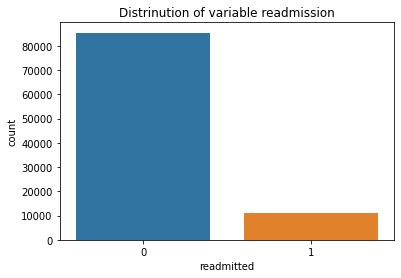

In [175]:
#Plot to the target variable 
sns.countplot(df['readmitted']).set_title('Distrinution of variable readmission') #target variable is imbalance.


In this graph it can be seen that there is a class imbalance in the variable

**Is there a relationship between the number of drugs used and readmission?**

Text(0.5, 1.0, 'Number of medication used Vs. Readmission')

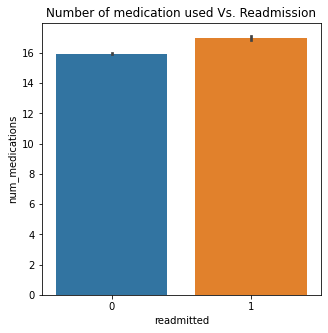

In [176]:
fig = plt.figure(figsize=(5,5))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used Vs. Readmission")

In this graph it is not possible to conclude that there is a relationship between readmission and the amount of medicine used

**is there a relationship between gender and readmission?**

Remember that *Male = 1 *Female = 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender of oatient Vs. Readmission')

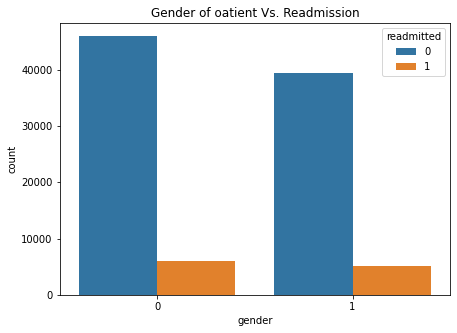

In [177]:
fig = plt.figure(figsize=(7,5))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of oatient Vs. Readmission")

In this case, the majority of people readmitted are female

**Glucose serum test result and Readmission**

'>200' : 1 = indicates diabetes
'>300' : 1 = Indicates diabetes
'Norm' : 0 = Normal
'None' : -1 = test was not taken 
**Remember that This variable was modified**

Text(0.5, 1.0, 'Glucose test serum test result Vs. Readmission')

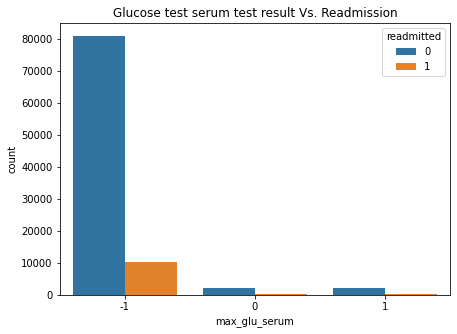

In [178]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x= df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result Vs. Readmission')

In this glasses it can be seen that there are a large number of patients who did not do this test

**What is the time of permanence of the users in the hospital?**

Text(0.5, 1.0, 'Time in the hospital Vs. Readmission')

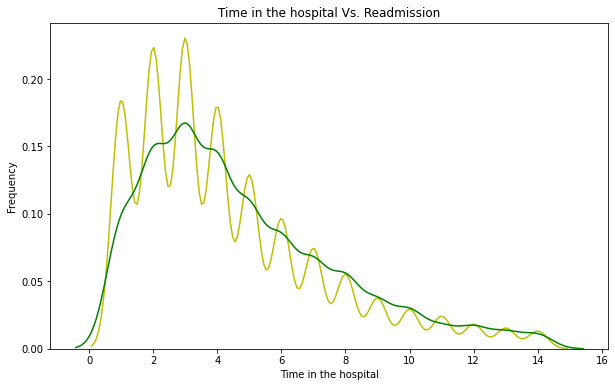

In [179]:
#Plot not Readmitted and Readmitted with the time in the hospital 
fig = plt.figure(figsize=(10,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='y',label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='g', label='Readmitted')
ax.set(xlabel='Time in the hospital', ylabel='Frequency')
plt.title('Time in the hospital Vs. Readmission')

On the y-axis is the time of the patient in the hospital, and on the X-axis the frequency with which the data is. In yellow are those not admitted and in green those admitted again

It can be observed that patients not admitted again have a peak in 4 days, but they present a rapid decrease in an undulating manner. But the patients who are re-admitted to the hospital also have a peak in 4 days, although with less number of patients, and also presents a decrease in the graph

**Is there a relationship between Ethnicity and readmission?**

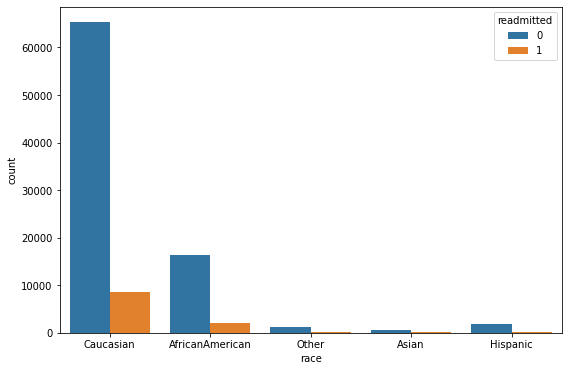

In [180]:
fig = plt.figure(figsize=(9,6))
sns.countplot(x= df['race'], hue = df['readmitted'])

In this graph we can conclude that the majority of patients belong to Caucasian 

**Is there a relationship between age and readmission?**

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

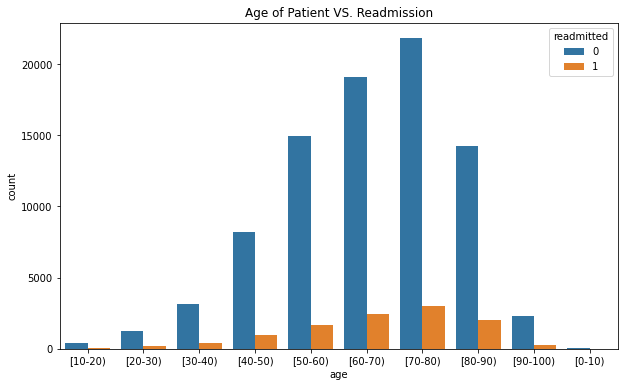

In [181]:
fig = plt.figure(figsize=(10,6))

sns.countplot(x= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

In this graph we can see that there are a large number of patients between 70 and 80 years of age.

# **MODEL: LogisticRegression**

Logistic regression **is a very simple and effective classification method** for many problems. It is easy to interpret and we can inspect which investment factors the most to obtain what kind of results.

Logistic regression is a relatively simple **machine learning technique**. Its results are interpretable and it is widely used in industry. It works very well when there is a lot of data and the interrelationships between them are not very complex

In order to make the model, it is necessary to process the data, here I make some changes

In [182]:
#convert data to 'object' type 
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
           'A1Cresult', 'max_glu_serum']

df[i] = df[i].astype('object')

In [183]:
df.dtypes #view new data type

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

There are some patients who may present complications and use more medicine than others, for this a count of the **medicine used** by the patients is performed

In [184]:
df['medicine'] = 0  #a DF with value of 0 is created
for col in keys:
    df['medicine'] = df['medicine'] + df[col]
df['medicine'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: medicine, dtype: int64

The maximum point is that patients have at least one medicine, however sometimes they require more than that value or even some have a value of 0

In [185]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_outpatient',
 'number_diagnoses',
 'num_procedures',
 'numchange',
 'time_in_hospital',
 'num_lab_procedures',
 'number_emergency',
 'service_utilization',
 'number_inpatient',
 'num_medications']

Select the variables that I am going to use in the model and that a preprocessing has already been carried out

In [186]:
feature_set = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
           'A1Cresult', 'max_glu_serum']  #variables for the model 

In [187]:
feature_set

['encounter_id',
 'patient_nbr',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'A1Cresult',
 'max_glu_serum']

In [188]:
X = df[feature_set]  #model input variables
y = df['readmitted'] # model output variables

# **Logistic regression**

In [189]:
df['readmitted'].value_counts() #model output variables 

0    85380
1    11066
Name: readmitted, dtype: int64

The data set is divided into 80-20, 80 training data, 20 test data  

In [190]:
#the data set is divided into 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) #divided data set 
#with random state 0,it will ensure that the same sequence of random numbers is generated every time you run the code.
logit = LogisticRegression(fit_intercept=True, penalty='l1', C=1,solver='liblinear') #model to logistic regression, 
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Solver=Algoritmo a utilizar en el problema de optimización.

Para conjuntos de datos pequeños, 'liblinear' es una buena opción, mientras que 'sag' y 'saga' son más rápidos para los grandes.

Para problemas multiclase, solo 'newton-cg', 'sag', 'saga' y 'lbfgs' manejan la pérdida multinomial; 'liblinear' se limita a esquemas uno versus resto.

'newton-cg', 'lbfgs', 'sag' y 'saga' manejan L2 o sin penalización

'liblinear' y 'saga' también manejan la penalización L1

'saga' también admite la penalización de 'elasticnet'

'liblinear' no admite la configuración penalty='none'

penalty= penalizacion 
Se utiliza para especificar la norma utilizada en la penalización.

In [191]:
logit_pred = logit.predict(X_test) #funtion to predict in the data test
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred), margins = True)
#table with the results

col_0,0,All
Actual,,
0,3230,3230
1,419,419
All,3649,3649


Metrics to evalued the model

In [127]:
# the metrics to evalued the model 
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred))) #accuracy
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred))) #precision
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred))) #recall 

Accuracy is 0.88
Precision is 0.00
Recall is 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model does not present the best possible result, this may be because the data set is unbalanced. To correct this there are many ways, in this case I will use SMOTE 

Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it

In [128]:
#I do the balancing of classes and create a new dataset with this class
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train) #I rename de data set 
print('New dataset shape {}'.format(Counter(train_output_new)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


New dataset shape Counter({0: 68339, 1: 68339})


In [129]:
# I use the new data set and apply the model again with the same characteristics
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))

X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1', C=1,solver='liblinear')
logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
logit_pred = logit.predict(X_test) #apply predict to the data test 
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True) #create a table with results 

Predict,0,1,All
Actual,,,
0,8083,5455,13538
1,6568,7230,13798
All,14651,12685,27336


Model evaluation metrics

In [131]:
#Model evaluation metrics
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred))) #accuracy
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred))) #precision
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred))) #recall

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.56
Precision is 0.57
Recall is 0.52


In [192]:
accuracy_logit 

0.5601770558969856

# **Conclusions**

*data preprocessing is performed and where some columns and some rows are removed


*An initial analysis of the data is performed where the null values ​​were marked with (?)


*Some graphs are made with the variables, contrasting with the output variable



*A logistic regression model is carried out that allows classifying the admission of patients, where the metrics show 50% of samples classified correctly